# Infarct Image Demo Notebook

This notebook demonstrates how to use the InfarctImage library to generate images of heart attack simulations and work with the Kaggle dataset.

Ensure that you have the necessary dependencies installed before running the notebook.

In [ ]:
# Install required libraries
! pip install diffusers torch torchvision kaggle

# Install the library from the repository
! pip install git+https://github.com/Turing-IA-IHC/InfarctImage.git

## Method 1: Using the model directly

In [ ]:
# Using the model directly
from diffusers import DiffusionPipeline
import torch
# Load the base model
infarct_pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2-1-base", torch_dtype=torch.float16, use_safetensors=True)
# Load LoRA weights
infarct_pipe.load_lora_weights("Gavit0/InfarctImage")
# Move to GPU if available
infarct_pipe.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
print("Model loaded successfully!")

  0%|          | 0/40 [00:00<?, ?it/s]

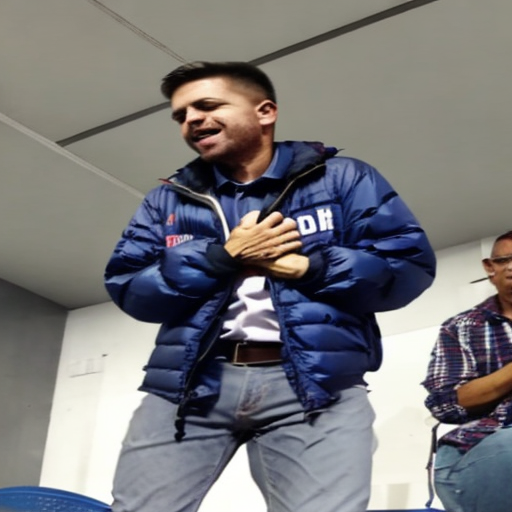

In [33]:
prompt = ("Elderly man at a sports stadium surrounded by a crowd, "
          "clutching his chest with a distressed look, indicating a heart attack."
         )
negative_prompt = (
          "blurry, deformed face, bad anatomy, poorly drawn face, out of focus, ugly, noisy, extra fingers, "
          "distorted, grainy, worst quality, low quality, low resolution, illustration, "
          "dull, watermark, close-up, 3d, 2d, painting, sketch, render, cartoon, grain, kitsch"
        )
trigger = "Person with expression of pain due to a heart attack, "
full_prompt = f"{trigger}, {prompt}"

image = infarct_pipe(prompt=full_prompt, negative_prompt=negative_prompt,
          guidance_scale=4, num_inference_steps=40).images[0]
image

## Method 2: Using Infarct library (recomended)

In [1]:
# Import the custom library
from infarctimage import InfarctImageCreator

In [ ]:
# Initialize the infarct model
infarct_model = InfarctImageCreator()

  0%|          | 0/40 [00:00<?, ?it/s]

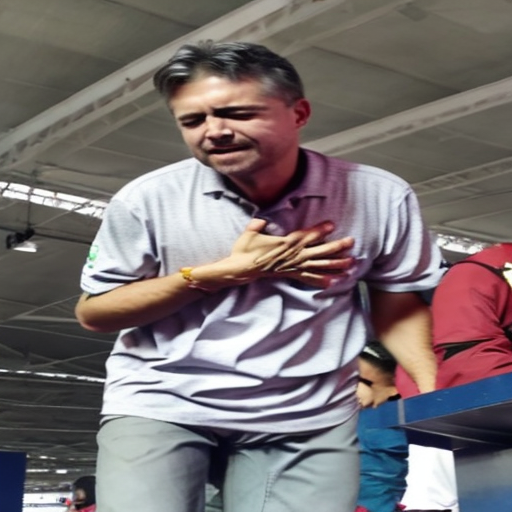

In [3]:
# Generate images
prompt = ("Elderly man at a sports stadium surrounded by a crowd, "
          "clutching his chest with a distressed look, indicating a heart attack."
         )
image = infarct_model.generate_image(prompt)
image

## Using images pre-generated dataset

In [17]:
# Import the custom library
from infarctimage import InfarctImageDataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.transforms.functional as F

torch.Size([3, 3, 256, 256])
Found 3 training images.
Image path: sd-2.1-infarct-lora-010-13049175.jpg


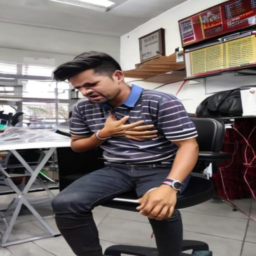

In [19]:
# Load dataset. If not exist download dataset from Kaggle

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to 128x128
    transforms.ToTensor(),  # Convert images to tensor
])

# Create dataset and DataLoader
dataset = InfarctImageDataset(split='train', transform=transform)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# Iterate through batches
for batch in dataloader:
    print(batch.shape)  # Expected output: (batch_size, 3, 128, 128)
    break

# Load and display dataset images
print(f"Found {len(dataset)} training images.")

# Display the first image path
print("Image path:", dataset.image_files[0])
image = dataset[0].permute(1, 2, 0).numpy()
image_pil = F.to_pil_image(image)
image_pil

## Using images dataset created on the fly

In [ ]:
# Import the custom library
from infarctimage import InfarctImageCreator
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.transforms.functional as F

# Initialize the infarct model
infarct_model = InfarctImageCreator()

In [2]:
# Create and save images dataset to disk
prompts = [
    "Elderly man at a sports stadium surrounded by a crowd, clutching his chest with a distressed look, indicating a heart attack.",
    "Elderly woman at a park, clutching his chest with a distressed look, indicating a heart attack."
  ]
infarct_model.generate_to_disk(prompts, num_images=4, save_dir='infarct_images')

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

Generated 4 images saved to infarct_images


  0%|          | 0/40 [00:00<?, ?it/s]

torch.Size([1, 3, 256, 256])


  0%|          | 0/40 [00:00<?, ?it/s]

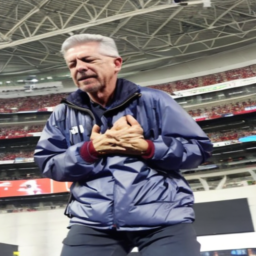

In [2]:
# Create and using images dataset on the fly
prompts = [
    "Elderly man at a sports stadium surrounded by a crowd, clutching his chest with a distressed look, indicating a heart attack.",
    "Elderly woman at a park, clutching his chest with a distressed look, indicating a heart attack."
  ]

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize images to 128x128
    transforms.ToTensor(),  # Convert images to tensor
])

# Create dataset and DataLoader
dataset = infarct_model.generate_dataset(prompts, num_images=8, transform=transform)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# Iterate through batches
for batch in dataloader:
    print(batch.shape)  # Expected output: (batch_size, 3, 128, 128)
    break

# Display the first image
image = dataset[0].permute(1, 2, 0).numpy()
image_pil = F.to_pil_image(image)
image_pil
    